In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from P3_helpers import *

In [2]:
# Load data
df = get_dataframe()
df_vote_evolution = get_timeserie_df(df)
df_vote_evolution.sample(5)

,Source,Target,Vote,Results,Year,Date,Comment,Round,Voting_time
100568,WJBscribe,Mtmelendez,1,1.0,2007.0,2007-09-25 22:35:00,'''Support''' - everything looks fine... <span...,1,19.300000
73563,SoWhy,Danielfolsom,1,-1.0,2008.0,2008-08-31 21:21:00,'''Support''' Low activity is not an important...,3,23.850000
137959,Pschemp,Joke137,1,1.0,2006.0,2006-02-01 05:26:00,'''Support'''. Slow and steady wins the race.,2,22.866667
3043,Foxj,Hahc21,-1,-1.0,2013.0,2013-02-11 15:39:00,Eek. The restriction that has only just been l...,2,15.916667
136669,Tickle me,Humus sapiens,1,1.0,2006.0,2006-04-20 15:12:00,'''Support''' per Dakota. --,2,41.650000


# Evolution of votes proportions through time

In [3]:
# Compute the progressive mean of the votes in each round (i.e. the mean of the votes at each time step)
progressive_mean = df_vote_evolution.groupby(['Target', 'Round']).apply(lambda x: x.Vote.cumsum() / np.arange(1, len(x)+1)).rename('progressive_mean')
# Replace the column Vote by the progressive mean
df_vote_evolution = df_vote_evolution.join(progressive_mean.droplevel([0,1]))
df_vote_evolution

,Source,Target,Vote,Results,Year,Date,Comment,Round,Voting_time,progressive_mean
0,Steel1943,BDD,1,1.0,2013.0,2013-04-19 23:13:00,'''Support''' as co-nom.,1,0.000000,1.0
1,Cuchullain,BDD,1,1.0,2013.0,2013-04-20 01:04:00,'''Support''' as nominator.--,1,1.850000,1.0
2,INeverCry,BDD,1,1.0,2013.0,2013-04-19 23:43:00,'''Support''' per noms.,1,0.500000,1.0
3,Cncmaster,BDD,1,1.0,2013.0,2013-04-20 00:11:00,'''Support''' per noms. BDD is a strong contri...,1,0.966667,1.0
4,Miniapolis,BDD,1,1.0,2013.0,2013-04-20 00:56:00,"'''Support''', with great pleasure. I work wit...",1,1.716667,1.0
...,...,...,...,...,...,...,...,...,...,...
198267,Hephaestos,Ugen64,1,1.0,2003.0,2003-12-06 16:05:00,Also support; seems like a good contributor. -,1,0.000000,1.0
198269,Cyan,Vancouverguy,1,1.0,2003.0,2003-08-31 02:13:00,Support. --,1,0.000000,1.0
198270,172,Vancouverguy,1,1.0,2003.0,2003-09-02 02:51:00,Support,2,0.000000,1.0
198271,Angela,WhisperToMe,1,1.0,2003.0,2003-11-26 23:45:00,Support.,1,0.000000,1.0


In [4]:
#Convert time in timedelta
df_vote_evolution.Voting_time = pd.to_timedelta(df_vote_evolution.Voting_time, unit='h')
df_vote_evolution.sort_values('Voting_time', inplace=True)
df_vote_evolution


,Source,Target,Vote,Results,Year,Date,Comment,Round,Voting_time,progressive_mean
0,Steel1943,BDD,1,1.0,2013.0,2013-04-19 23:13:00,'''Support''' as co-nom.,1,0 days 00:00:00,1.0
90986,Hoary,Dekimasu,1,1.0,2007.0,2007-05-07 07:50:00,'''Support'''. この人はこういう義務をできますよ。賛成！--,1,0 days 00:00:00,1.0
91030,WJBscribe,Delldot,1,1.0,2007.0,2007-02-11 00:25:00,'''Beat the nom but beaten by the nom-beater s...,1,0 days 00:00:00,1.0
91094,The Rambling Man,DerHexer,1,1.0,2007.0,2007-07-13 16:21:00,'''Beat both co-noms support''' - good luck!,1,0 days 00:00:00,1.0
91214,Ozgod,Deryck Chan,1,1.0,2007.0,2007-02-23 06:30:00,'''Support''' I see nothing terribly wrong her...,3,0 days 00:00:00,1.0
...,...,...,...,...,...,...,...,...,...,...
105809,StuffOfInterest,SchuminWeb,1,1.0,2007.0,2007-06-11 16:32:00,'''Support'''. Would prefer to see a little l...,2,33 days 00:09:00,1.0
105810,Blnguyen,SchuminWeb,1,1.0,2007.0,2007-06-12 00:26:00,'''Support''' - good contributor. ''',2,33 days 08:03:00,1.0
105811,Captain panda,SchuminWeb,1,1.0,2007.0,2007-06-12 01:17:00,'''Support''' A good one to have the tools.,2,33 days 08:54:00,1.0
105812,Vision Thing,SchuminWeb,1,1.0,2007.0,2007-06-12 19:23:00,'''Support''' I had some doubts on his last Rf...,2,34 days 03:00:00,1.0


,Voting_time,0
0,0.000000,4861
18944,0.016667,1
1216,0.016667,34
5,0.016667,349
11743,0.016667,2
...,...,...
13389,792.150000,1
13233,800.050000,1
13256,800.900000,1
12905,819.000000,1


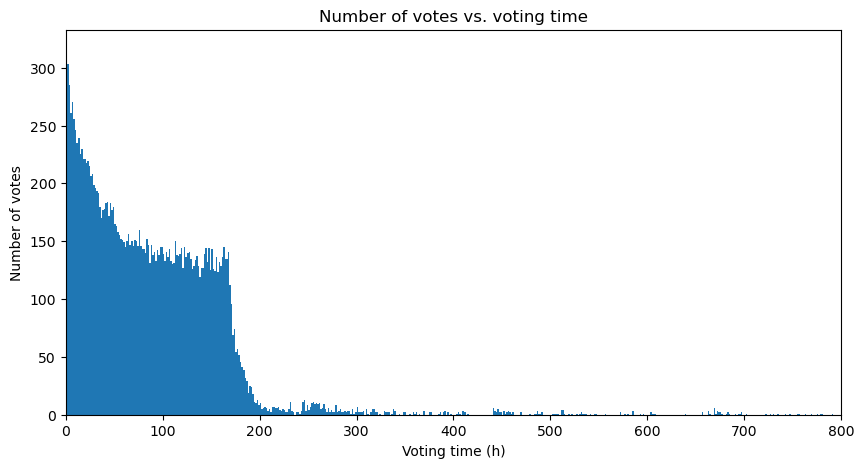

In [18]:
# Number of votes with the same voting time
number_votes = df_vote_evolution.groupby('Voting_time').size().sort_values(ascending=False).reset_index()
number_votes.Voting_time = number_votes.Voting_time.dt.total_seconds() / 3600
number_votes.sort_values('Voting_time', inplace=True)
display(number_votes)

# Plot number_votes vs. voting time
plt.figure(figsize=(10,5))
plt.hist(number_votes.Voting_time, bins=1000)
#plt.plot(number_votes.Voting_time, number_votes[0])
plt.xlabel('Voting time (h)')
plt.ylabel('Number of votes')
plt.title('Number of votes vs. voting time')
plt.xlim(0, 800)
plt.show()

In [41]:
# Moving average of the progressive mean by filtering the data with a window of 1 hour
rolling_avg2 = df_vote_evolution.groupby(['Results', pd.Grouper(key='Voting_time', freq='1h', origin='start')]).progressive_mean

# Compute the mean and first and last quartile of the progressive mean in each window 
rolling_avg2 = rolling_avg2.agg(['mean', 'first', 'last', 'count']).rename(columns={'mean': 'mean', 'first': '25%', 'last': '75%', 'count': 'count'}).reset_index(level='Voting_time')
rolling_avg2.Voting_time = rolling_avg2.Voting_time.dt.total_seconds() / 3600
rolling_avg2


,Voting_time,mean,25%,75%,count
Results,,,,,
-1.0,0.0,0.103636,1.000000,-0.500000,10174
-1.0,1.0,0.260499,-0.200000,1.000000,4102
-1.0,2.0,0.320179,-0.600000,1.000000,2896
-1.0,3.0,0.352002,0.972603,-0.384615,2375
-1.0,4.0,0.410734,1.000000,1.000000,1986
...,...,...,...,...,...
1.0,779.0,1.000000,1.000000,1.000000,1
1.0,792.0,1.000000,1.000000,1.000000,1
1.0,800.0,1.000000,1.000000,1.000000,2


In [50]:
# Moving average of the progressive mean by filtering the data with a window of 1 hour
rolling_avg = df_vote_evolution.groupby(['Results', pd.Grouper(key='Voting_time', freq='1h', origin='start')]).progressive_mean

# Compute the mean and 95% confidence interval of the progressive mean in each window
# rolling_avg = rolling_avg.agg(['mean', 'first', 'last', 'count']).rename(columns={'mean': 'mean', 'first': '25%', 'last': '75%', 'count': 'count'}).reset_index(level='Voting_time')
rolling_avg = rolling_avg.agg(['mean', stats.sem]).rename(columns={'mean': 'mean', 'sem': 'sem'}).reset_index(level='Voting_time')
rolling_avg.Voting_time = rolling_avg.Voting_time.dt.total_seconds() / 3600
rolling_avg['lower'] = rolling_avg['mean'] - 1.96 * rolling_avg['sem']
rolling_avg['upper'] = rolling_avg['mean'] + 1.96 * rolling_avg['sem']
rolling_avg

,Voting_time,mean,sem,lower,upper
Results,,,,,
-1.0,0.0,0.103636,0.008355,0.087261,0.120012
-1.0,1.0,0.260499,0.011988,0.237002,0.283997
-1.0,2.0,0.320179,0.013793,0.293145,0.347214
-1.0,3.0,0.352002,0.014711,0.323168,0.380835
-1.0,4.0,0.410734,0.015396,0.380559,0.440910
...,...,...,...,...,...
1.0,779.0,1.000000,NaN,NaN,NaN
1.0,792.0,1.000000,NaN,NaN,NaN
1.0,800.0,1.000000,0.000000,1.000000,1.000000


In [85]:
round_voting_time = df_vote_evolution.copy()
# Combine the rows with the same voting time and results
round_voting_time = round_voting_time.groupby(['Results', 'Voting_time']).progressive_mean.mean().reset_index()

# Convert time in timedelta to apply the rolling average
round_voting_time.Voting_time = pd.to_timedelta(round_voting_time.Voting_time, unit='h')
round_voting_time.sort_values('Voting_time', inplace=True)
round_voting_time['rolling_average'] = round_voting_time.groupby('Results').rolling('1h', on='Voting_time').progressive_mean.mean().reset_index(drop=True)
round_voting_time.Voting_time = (round_voting_time.Voting_time.dt.total_seconds()/3600).round(0).astype(int)
round_voting_time

,Results,Voting_time,progressive_mean,rolling_average
0,-1.0,0,0.213352,0.213352
13808,1.0,0,0.983822,0.983822
13809,1.0,0,0.988827,0.986324
13810,1.0,0,1.000000,0.990883
1,-1.0,0,0.639824,0.426588
...,...,...,...,...
29527,1.0,792,1.000000,1.000000
29528,1.0,800,1.000000,1.000000
29529,1.0,801,1.000000,1.000000
29530,1.0,819,1.000000,1.000000


<Axes: xlabel='Voting_time', ylabel='rolling_average'>

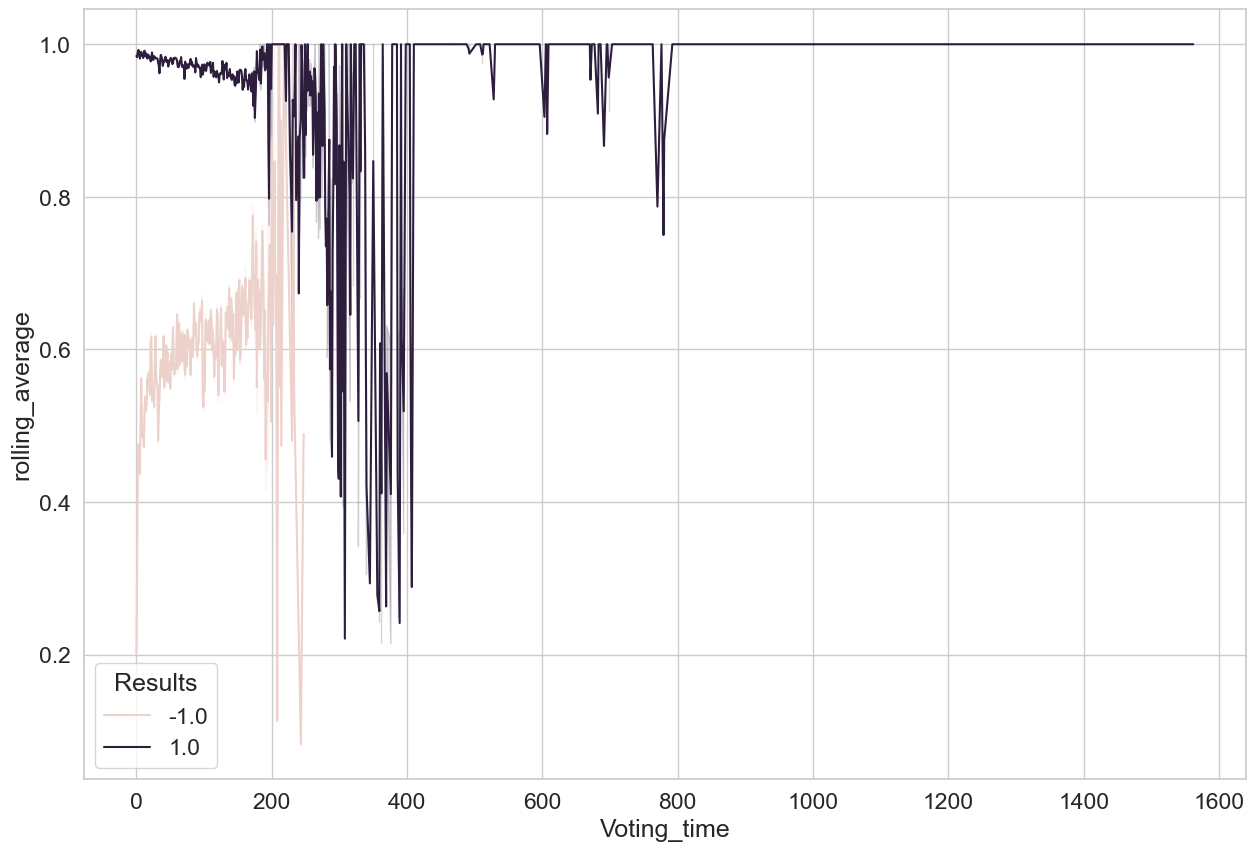

In [86]:
# Plot the progressive mean of the votes for each hour and each result
plt.figure(figsize=(15, 10))
sns.lineplot(data=round_voting_time, x='Voting_time', y='rolling_average', hue='Results', errorbar=("ci", 95))

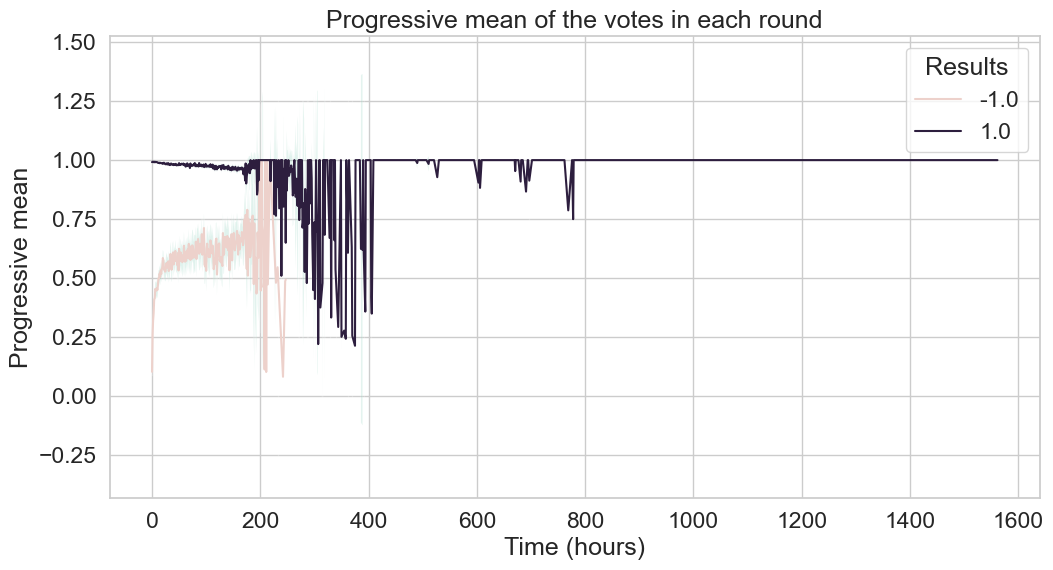

In [64]:
# Plot the mean and 95% confidence interval of the progressive mean in each window
plt.figure(figsize=(12, 6))
sns.lineplot(x='Voting_time', y='mean', hue='Results', data=rolling_avg, 
plt.fill_between(rolling_avg.Voting_time, rolling_avg.lower, rolling_avg.upper, alpha=0.2)
plt.xlabel('Time (hours)')
plt.ylabel('Progressive mean')
plt.title('Progressive mean of the votes in each round')
plt.show()

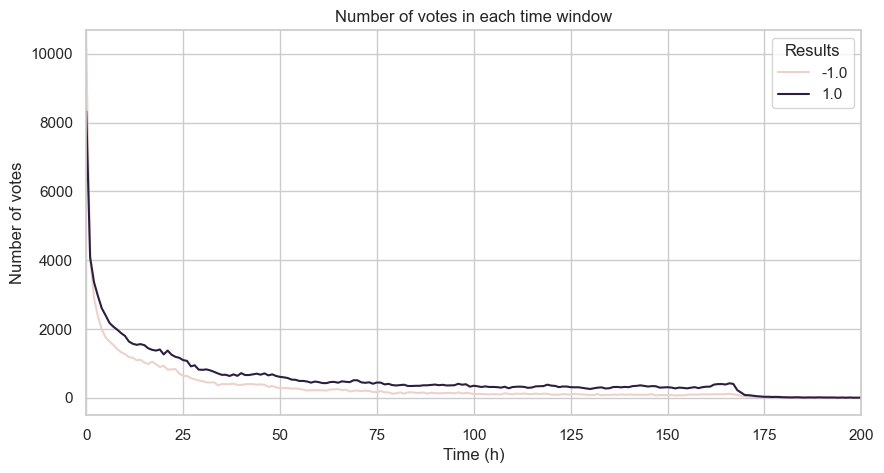

In [49]:
# Plot the count of votes in each window
fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(data=rolling_avg, x='Voting_time', y='count', hue='Results', ax=ax)
ax.set_xlabel('Time (h)')
ax.set_ylabel('Number of votes')
ax.set_title('Number of votes in each time window')
ax.set_xlim(0, 200)
plt.show()


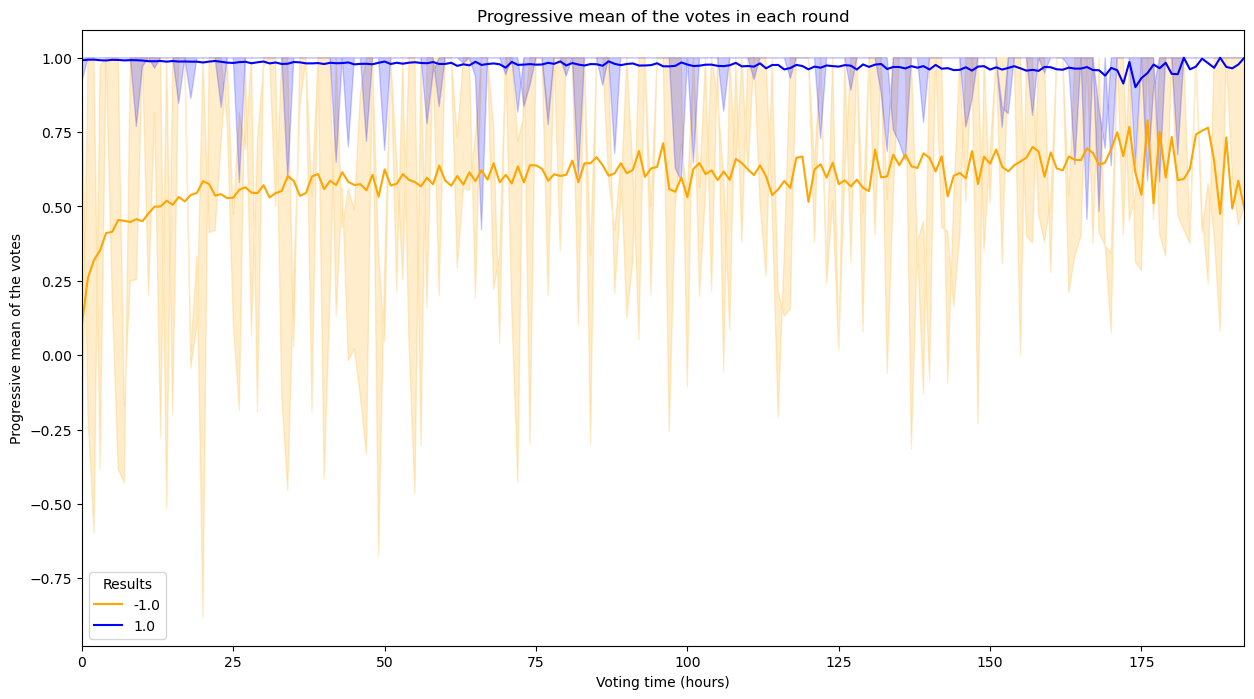

In [45]:
# Plot the progressive mean and the first and last quartile of the progressive mean in each window
plt.figure(figsize=(15, 8))
sns.lineplot(data=rolling_avg, x='Voting_time', y='mean', hue='Results', palette=['orange', 'blue'])
plt.fill_between(rolling_avg.loc[-1].Voting_time, rolling_avg.loc[-1]['25%'], rolling_avg.loc[-1]['75%'], alpha=0.2, color='orange')
plt.fill_between(rolling_avg.loc[1].Voting_time, rolling_avg.loc[1]['25%'], rolling_avg.loc[1]['75%'], alpha=0.2, color='blue')
plt.xlim(0, 8*24)
plt.title('Progressive mean of the votes in each round')
plt.xlabel('Voting time (hours)')
plt.ylabel('Progressive mean of the votes')
plt.show()